In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from typing import List

Zadanie 4.1

In [107]:
def estimate_EX(num_samples: int = 10000, num_bins: int = 50) -> None:
    """
    Estimates E(Z|X) where Z = XY + sin(X) with X and Y as independent standard normal variables.

    Parameters:
    num_samples (int): Number of samples to generate for X and Y. Default to 10000.
    num_bins (int): Number of bins to use for estimating E(Z|X). It's value is calculated as an average of Z values per bin. Default to 50.

    Returns:
    None

    Example:
    --------
    >>> estimate_EX(num_samples=5000, num_bins=30)
    This will generate a scatter plot of simulated values of Z versus X,
    and plot both the theoretical E(Z|X) = sin(X) and the estimated E(Z|X)
    using 5000 samples and 30 bins.
    """

    X = np.random.standard_normal(num_samples)
    Y = np.random.standard_normal(num_samples)
    Z = X * Y + np.sin(X)

    sinus = np.sin(X)
    sorted_X = np.argsort(X)

    bins = np.linspace(np.min(X), np.max(X), num_bins + 1)
    bin_indices = np.digitize(X, bins)

    # Calculate an average value of Z per bin
    E_Z_estimated = np.array(
        [
            Z[bin_indices == i].mean() if np.sum(bin_indices == i) > 0 else 0
            for i in range(1, num_bins + 1)
        ]
    )
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    plt.scatter(X, Z, label="Simulated values of Z", alpha=0.2)
    plt.plot(
        X[sorted_X],
        sinus[sorted_X],
        color="red",
        label="Theoretical E(Z|X) = sin(X)",
        alpha=0.5,
    )
    plt.plot(
        bin_centers,
        E_Z_estimated,
        color="black",
        linestyle="dashed",
        label="Estimated E(Z|X)",
    )

    plt.xlabel("X")
    plt.ylabel("Z")
    plt.title("Plot of E(Z|X) estimation using Z=XY+sin(X) and X,Y ~ N(0,1)")
    plt.grid(True, linestyle="--")
    plt.legend()
    plt.show()

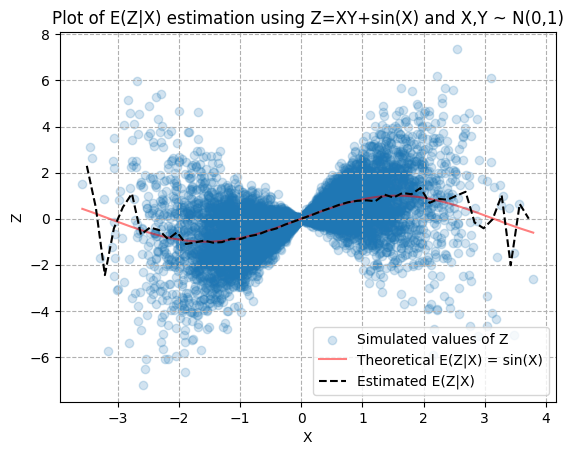

In [108]:
estimate_EX()

Zadanie 4.2

In [109]:
def simulate_poisson_process(
    T: float = 10,
    lam: float = 10,
    num_realizations: int = 5,
    interpolate_up_to_T: bool = True,
) -> None:
    """
    Simulates a Poisson process and calculates E(Nt|NT) for multiple realizations. Times variable t is divided into num_bins bins,
    because it varies depending realization.

    Parameters:
    T (float): The final time T.
    lam (float): The intensity rate of the Poisson process.
    num_realizations (int): Number of realizations of the Poisson process.
    interpolate_up_to_T (bool): Whether to interpolate E(Nt|NT) up to T if there are no observations beyond some t and T.
                                Mostly for plotting reason. Default to True.


    Returns:
    None

    Example:
    --------
    >>> simulate_poisson_process(T = 10, lam = 10, num_realizations = 5, interpolate_up_to_T = True)
    This will generate a plot of estimated E(Nt|NT) for several realizations of the Poisson process.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    colors = plt.cm.viridis(np.linspace(0, 1, num_realizations))

    for i in range(num_realizations):
        N_T = np.random.poisson(lam * T)
        t = np.array([0])
        if N_T == 0:
            ax1.plot(0, label="E(Nt|NT) for N(T)=0", alpha=0.5, color=colors[i])
            ax2.scatter([0], [0], label="N(T)=0", alpha=0.5, color=colors[i])
            continue
        t = np.append(t, np.sort(np.random.uniform(0, T, N_T)))
        ax2.step(
            np.append(t, T + 0.5),
            np.arange(0, len(t) + 1),
            where="post",
            label=f"N(T)={N_T}",
            color=colors[i],
        )
        # E(Nt|NT)
        E_Nt_NT = (t * N_T) / T
        if interpolate_up_to_T:
            f = interp1d(t, E_Nt_NT, kind="linear", fill_value="extrapolate")
            t_interpolated = np.linspace(0, T, 100)
            E_Nt_NT_interpolated = f(t_interpolated)
            E_Nt_NT = np.append(E_Nt_NT, E_Nt_NT_interpolated)
            t = np.append(t, t_interpolated)

        ax1.plot(
            t, E_Nt_NT, label=f"E(Nt|NT) for N(T)={N_T}", alpha=0.5, color=colors[i]
        )

    ax1.set_xlabel("t")
    ax1.set_ylabel("E(Nt|NT)")
    ax1.set_xlim(0, T)
    ax1.set_title(
        f"t → E(Nt|NT) for several realizations (interpolated up to T = {interpolate_up_to_T})"
    )
    ax1.grid(True, linestyle="--")
    ax1.legend(loc="upper left")

    ax2.set_xlabel("t")
    ax2.set_ylabel("N(T)")
    ax2.set_xlim(0, T)
    ax2.set_title("Individual Poisson Processes")
    ax2.grid(True, linestyle="--")
    ax2.legend(loc="upper left")

    plt.tight_layout()
    plt.show()

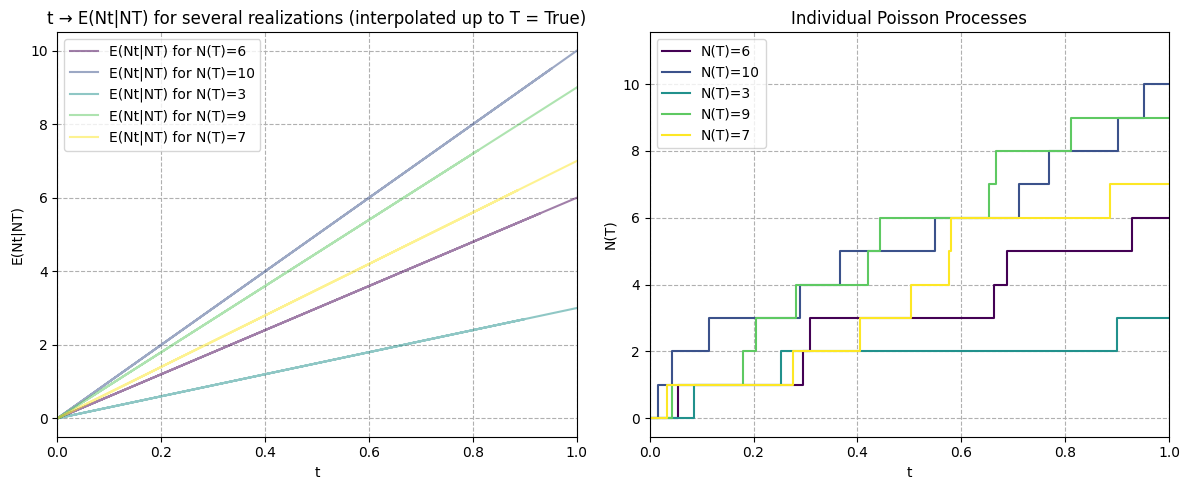

In [110]:
T = 1
lambda_ = 10
num_realizations = 5
num_bins = 5
simulate_poisson_process(T, lambda_, num_realizations, interpolate_up_to_T=True)

Zadanie 4.3

In [30]:
def simulate_poisson_process_to_s(
    s: float = 1,
    lam: float = 10,
    N_s_values: List[int] = [3],
    T: float = 10,
    num_simulations: int = 3,
) -> None:
    """
    Simulates a Poisson process and calculates E(Nt|Fs) for multiple realizations.

    Parameters:
    s (float): The time up to which the process is observed. Defaults to 1.
    lam (float): The intensity rate of the Poisson process. Defaults to 10.
    N_s_values (List[int]): Predefined values of N_s. Defaults to [3].
    T (float): The end time for simulation. Defaults to 10.
    num_simulations (int): Number of simulations for each Ns value. Defaults to 3.


    Returns:
    None

    Example:
    --------
    >>> s = 1
    >>> lam = 10
    >>> N_s_values = [2,5]
    >>> T = 2
    >>> num_simulations = 3
    >>> simulate_poisson_process_to_s(T = 10, lam = 10, num_realizations = 5, interpolate_up_to_T = True)
    This will generate a plot of estimated E(Nt|NT) for several realizations of the Poisson process.
    """
    t_values = np.linspace(s, T, 100)

    theoretical = [(t_values, N_s + lam * (t_values - s)) for N_s in N_s_values]

    # Simulation from s to t for each N_s
    simulated_results = []
    for N_s in N_s_values:
        trajectories = []
        for _ in range(num_simulations):
            increments = np.random.poisson(
                lam * (t_values[1] - t_values[0]), len(t_values) - 1
            )
            N_t_trajectory = np.concatenate([[N_s], N_s + np.cumsum(increments)])
            trajectories.append(N_t_trajectory)
        simulated_results.append(trajectories)

    num_plots = len(N_s_values)
    fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6 * num_plots))

    for i, (N_s, (t_values, E_N_t_given_F_s)) in enumerate(
        zip(N_s_values, theoretical)
    ):
        ax = axs[i] if num_plots > 1 else axs

        for trajectory in simulated_results[i]:
            ax.plot(t_values, trajectory, alpha=0.5)

        ax.plot(
            t_values, E_N_t_given_F_s, label=f"Theoretical $Ns$ = {N_s}", linewidth=2
        )

        ax.set_xlabel("t")
        ax.set_ylabel(r"E(Nt | Fs)$")
        ax.set_title(r"Plot of E(Nt | Fs) = Ns + lambda(t - s)")
        ax.legend()
        ax.grid(True)

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

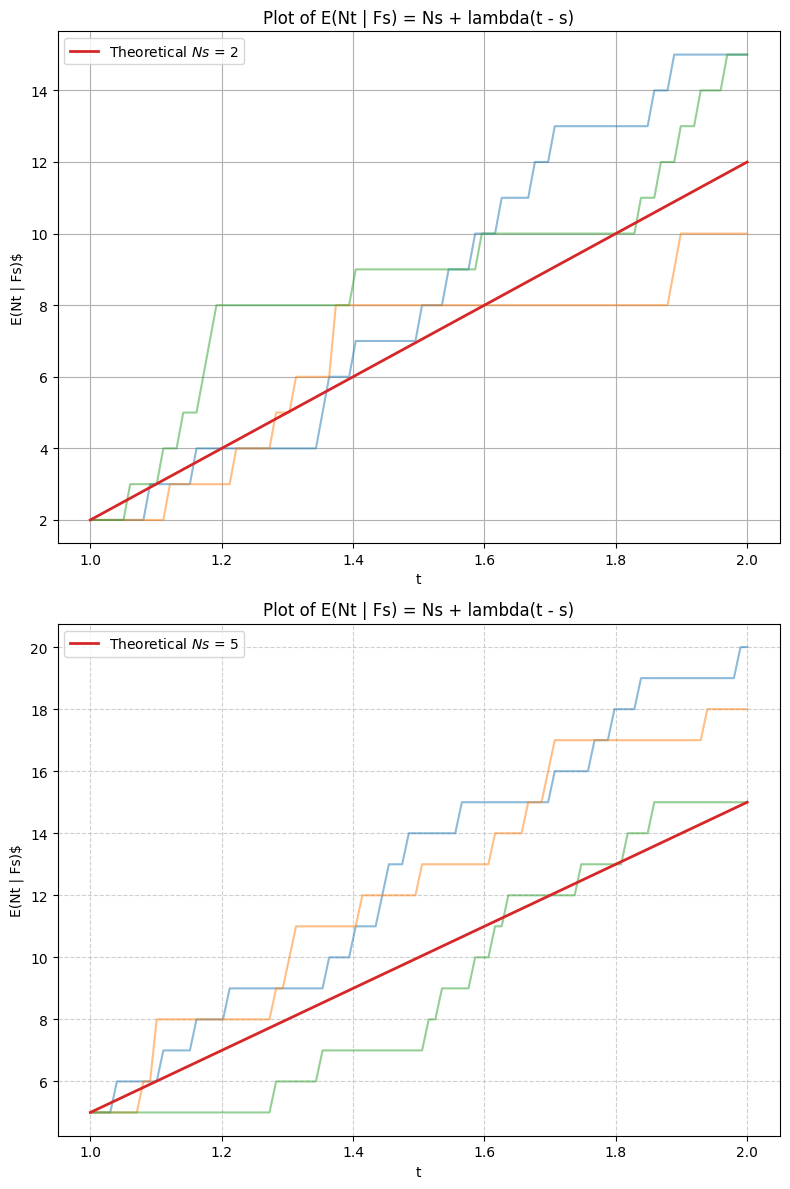

In [31]:
s = 1
lam = 10
N_s_values = [2, 5]
T = 2
num_simulations = 3

simulate_poisson_process_to_s(s, lambda_, N_s_values, T, num_simulations)